In [ ]:
import pandas as pd

def load_data(file_path):
    texts = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                texts.append(parts[0])
                labels.append(parts[1])
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = load_data('/content/train.txt')
val_df = load_data('/content/val.txt')
test_df = load_data('/content/test.txt')


In [ ]:
print(train_df.head())
print(train_df['label'].value_counts())


Empty DataFrame
Columns: [text, label]
Index: []
Series([], Name: count, dtype: int64)


In [ ]:
with open('/content/train.txt', 'r', encoding='utf-8') as f:
    for i in range(10):  # show first 10 lines
        print(repr(f.readline()))


'i didnt feel humiliated;sadness\n'
'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n'
'im grabbing a minute to post i feel greedy wrong;anger\n'
'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n'
'i am feeling grouchy;anger\n'
'ive been feeling a little burdened lately wasnt sure why that was;sadness\n'
'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n'
'i feel as confused about life as a teenager or as jaded as a year old man;fear\n'
'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n'
'i feel romantic too;love\n'


In [ ]:
import pandas as pd


In [ ]:
def load_data(file_path):
    texts = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(';')
            if len(parts) == 2:
                texts.append(parts[0])
                labels.append(parts[1])
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = load_data('/content/train.txt')
val_df = load_data('/content/val.txt')
test_df = load_data('/content/test.txt')

print(train_df.head())
print(train_df['label'].value_counts())


                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Parameters
max_len = 100

# Tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['text']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=max_len)

# Label encoding
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(train_df['label']))
y_val = to_categorical(label_encoder.transform(val_df['label']))
y_test = to_categorical(label_encoder.transform(test_df['label']))

num_classes = y_train.shape[1]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,               # You can reduce to 5 if needed
    batch_size=32,
    verbose=1
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.3998 - loss: 1.4939 - val_accuracy: 0.8195 - val_loss: 0.5791
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.8801 - loss: 0.3967 - val_accuracy: 0.9015 - val_loss: 0.3078
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.9521 - loss: 0.1474 - val_accuracy: 0.9115 - val_loss: 0.2892
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9710 - loss: 0.0968 - val_accuracy: 0.9145 - val_loss: 0.3177
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9792 - loss: 0.0616 - val_accuracy: 0.9130 - val_loss: 0.2935
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9835 - loss: 0.0523 - val_accuracy: 0.9140 - val_loss: 0.2946
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9871 - loss: 0.0417 - val_accuracy: 0.9150 - val_loss: 0.3264
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9881 - loss: 0.0427 - 

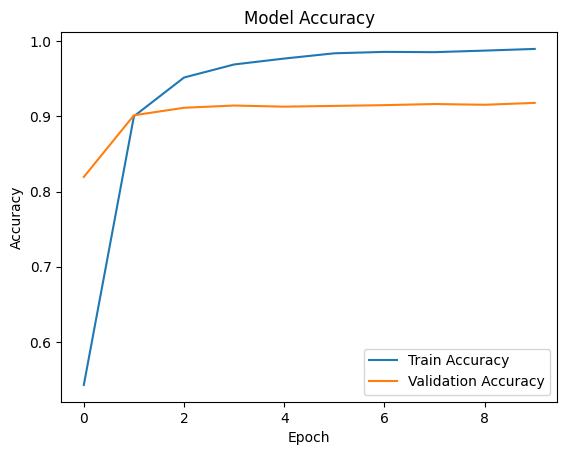

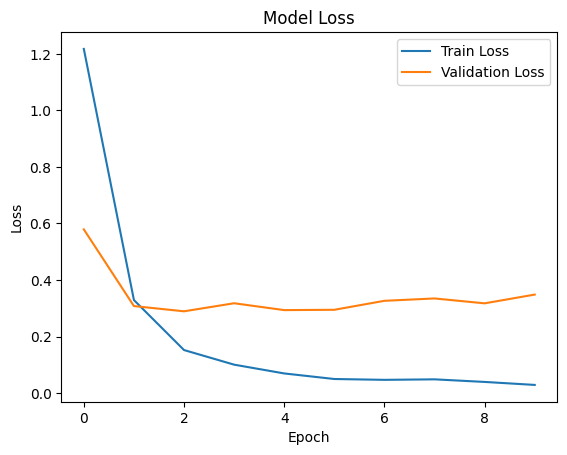

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9120 - loss: 0.3497
Test Accuracy: 0.9175


In [ ]:
import numpy as np

# Mood suggestion mapping
mood_response = {
    'sadness': "Feeling down? Try watching a motivational movie.",
    'joy': "You're happy! A fun comedy or musical might match your vibe!",
    'anger': "Frustrated? Try a relaxing nature documentary.",
    'fear': "Scared? Maybe a feel-good movie will help.",
    'love': "Feeling the love? A romantic drama could be perfect.",
    'surprise': "Surprised? Try a thriller or mystery!"
}

# Prediction function
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)
    label_index = np.argmax(prediction)
    emotion = label_encoder.inverse_transform([label_index])[0]
    suggestion = mood_response.get(emotion, "No suggestion found.")
    return emotion, suggestion


In [ ]:
text_input = "I'm feeling really frustrated today."
emotion, suggestion = predict_emotion(text_input)
print("Detected Emotion:", emotion)
print("Mood-Based Suggestion:", suggestion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Detected Emotion: anger
Mood-Based Suggestion: Frustrated? Try a relaxing nature documentary.


In [ ]:
model.save("emotion_model.h5")

import pickle
pickle.dump(tokenizer, open("tokenizer.pickle", "wb"))
pickle.dump(label_encoder, open("label_encoder.pickle", "wb"))


In [ ]:
text_input = "I'm feeling really awesome today."
emotion, suggestion = predict_emotion(text_input)
print("Detected Emotion:", emotion)
print("Mood-Based Suggestion:", suggestion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Detected Emotion: joy
Mood-Based Suggestion: You're happy! A fun comedy or musical might match your vibe!


In [ ]:
text_input = "I'm feeling really frustrated today."
emotion, suggestion = predict_emotion(text_input)
print("Detected Emotion:", emotion)
print("Mood-Based Suggestion:", suggestion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Detected Emotion: anger
Mood-Based Suggestion: Frustrated? Try a relaxing nature documentary.


In [ ]:
text_input = "I'm feeling really low today."
emotion, suggestion = predict_emotion(text_input)
print("Detected Emotion:", emotion)
print("Mood-Based Suggestion:", suggestion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Detected Emotion: sadness
Mood-Based Suggestion: Feeling down? Try watching a motivational movie.
